In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load the Iris dataset
iris_df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

In [21]:
# Display the dataset
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


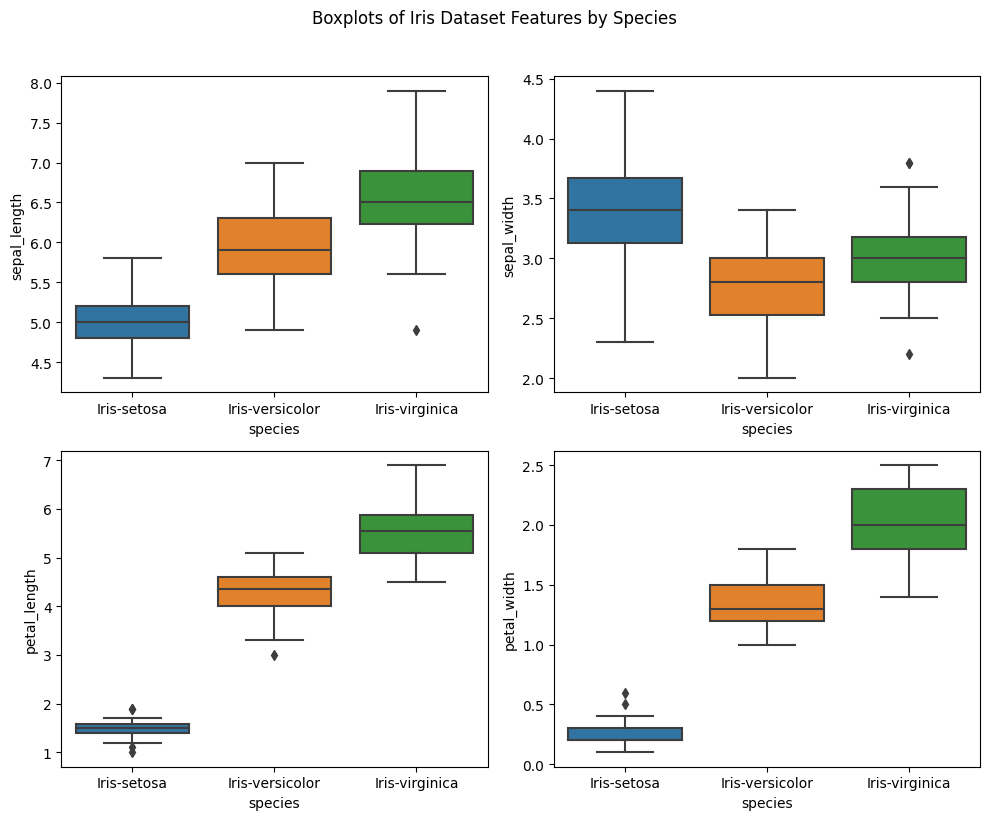

In [24]:
# Boxplot to visualize distribution of each feature by species
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    sns.boxplot(x='species', y=X.columns[i], data=iris_df, ax=ax)
fig.suptitle('Boxplots of Iris Dataset Features by Species', y=1.02)
plt.tight_layout()
plt.show()

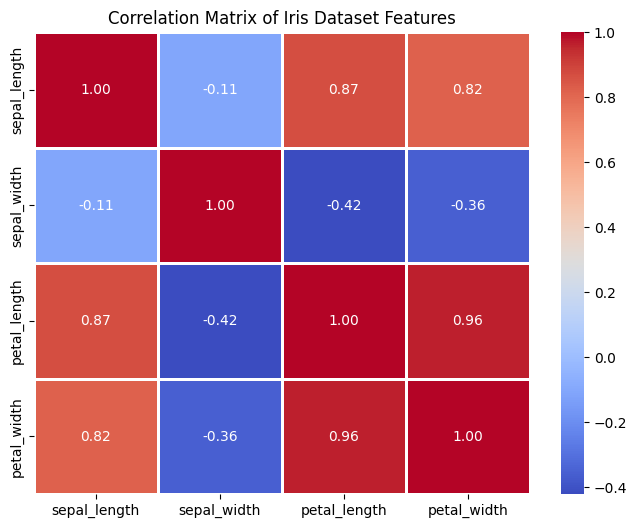

In [25]:
# Calculate correlation matrix
corr_matrix = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

In [38]:
# Separate features and target variable
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['species']

In [42]:
# Encode the target variable y using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [43]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [44]:
# Preprocessing: Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Model definition: Support Vector Classifier
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [46]:
# Training the model
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [47]:
# Evaluating model performance with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

In [48]:
# Print the average accuracy across folds
print(f'Average cross-validation accuracy: {accuracy.mean()*100:.2f}%')

Average cross-validation accuracy: 95.00%


In [49]:
# Predictions on the test set
y_pred = model.predict(X_test_scaled)

In [50]:
# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {test_accuracy*100:.2f}%')

Test set accuracy: 100.00%
